# TP_Examen_Deep_Learning

###  2- Utilizando el mismo dataset que en el link anterior, diseñar una red neuronal que haga un overfitting sobre el dataset. ¿Cómo saben que la red neuronal está haciendo overfitting? Agregar regularización y encontrar los parámetros correctos para lograr un buen fit. Explicar el procedimiento realizado.


#### Importamos bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Definimos funciones

In [2]:
def initialize_parameters(n_x, n_h1, n_h2, n_h3, n_y):

    np.random.seed(1)

    W1 = np.random.randn(n_h1,n_x)*0.1
    b1 = np.zeros((n_h1,1))
    W2 = np.random.randn(n_h2,n_h1)*0.1
    b2 = np.zeros((n_h2,1))
    W3 = np.random.randn(n_h3,n_h2)*0.1
    b3 = np.zeros((n_h3,1))
    W4 = np.random.randn(n_y,n_h3)*0.1
    b4 = np.zeros((n_y,1))


    assert (W1.shape == (n_h1, n_x))
    assert (b1.shape == (n_h1, 1))
    assert (W2.shape == (n_h2, n_h1))
    assert (b2.shape == (n_h2, 1))
    assert (W3.shape == (n_h3, n_h2))
    assert (b3.shape == (n_h3, 1))
    assert (W4.shape == (n_y, n_h3))
    assert (b4.shape == (n_y, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4}

    return parameters

In [3]:
# Sigmoid_function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s
# Derivative_Sigmoid
def derivative_sigmoid(s):
    #s = sigmoid(x)
    ds = s*(1-s)
    return ds

In [4]:
def forward_propagation(X, parameters):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    #####################
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]



    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)

    Z2 = np.dot(W2,A1) + b2
    A2 = np.tanh(Z2)

    Z3 = np.dot(W3,A2) + b3
    A3 = sigmoid(Z3)

    Z4 = np.dot(W4,A3) + b4


    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3": Z3,
             "A3": A3,
             "Z4": Z4}

    return Z4, cache


In [5]:
def compute_cost(parameters, ladba, Z, Y):

    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    W4 = parameters["W4"]
    Y = np.reshape(Y,(1,1))
    # Regulation_L2
    L2_reg = (ladba/2)*(np.sum(np.square(W1))+np.sum(np.square(W2))+np.sum(np.square(W3))+np.sum(np.square(W4)))
    cost = (Y - Z) + L2_reg

    return cost


In [6]:
def backward_propagation(parameters, ladba, cache, X, Y):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    #####################
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]

    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    Z3 = cache["Z3"]
    Z4 = cache["Z4"]

    dZ4 = -2*(Y-Z4)
    dW4 = np.dot(dZ4,A3.T)+(ladba*W4)
    db4 = dZ4
    dZ3 = np.multiply(np.dot(W4.T, dZ4), derivative_sigmoid(A3))
    dW3 = np.dot(dZ3, A2.T)+(ladba*W3)
    db3 = dZ3
    dZ2 = np.dot(W3.T,dZ3) * (1 - np.power(A2,2))
    dW2 = np.dot(dZ2, A1.T)+(ladba*W2)
    db2 = dZ2
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = np.dot(dZ1, X.T)+(ladba*W1)
    db1 = dZ1


    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3,
             "dW4": dW4,
             "db4": db4}

    return grads


In [7]:
def update_parameters(parameters, grads, learning_rate):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    #####################
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]
    ### END CODE HERE ###


    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ########################
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    dW4 = grads["dW4"]
    db4 = grads["db4"]


    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    W4 = W4 - learning_rate * dW4
    b4 = b4 - learning_rate * db4


    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4}

    return parameters

#### Neural Network

In [8]:
# NN_model
def nn_model(X, Y, x_valid, y_valid, n1,n2,n3,ladba, learning_rate, num_iterations):

    losses = np.zeros((num_iterations, 1))
    losses_valid = np.zeros((num_iterations, 1))
    parameters = initialize_parameters(n_x=1, n_h1=n1, n_h2=n2, n_h3=n3, n_y=1)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]

    salida=[]
    # Loop (SGD)
    for i in range(0, num_iterations):
        #Training
        for j in range (8041):
        # Forward propagation
            Z, cache = forward_propagation(X[j], parameters)
            error = compute_cost(parameters,ladba,Z, Y[j])
        # Backpropagation
            grads = backward_propagation(parameters,ladba,cache, X[j], Y[j])
        # Update each parameter
            parameters = update_parameters(parameters, grads, learning_rate)

            cost =  np.sum(np.power(error,2))
            salida.append(Z)
        MSE = cost/8041
        #plt.plot(i,MSE,'bo')
        losses[i, 0]= MSE

        #Valid
        for g in range (1959):
        # Forward propagation
            Z, cache = forward_propagation(x_valid[g], parameters)
            error = compute_cost(parameters,ladba,Z, y_valid[g])
        # Backpropagation
            #grads = backward_propagation(parameters,ladba,cache, x_valid[g], y_valid[g])
        # Update each parameter
            #parameters = update_parameters(parameters, grads, learning_rate)

            cost =  np.sum(np.power(error,2))
            #salida.append(Z)
        MSE_valid = cost/1959
        #plt.plot(i,MSE,'bo')
        losses_valid[i, 0]= MSE_valid
    return parameters, salida, losses, losses_valid

#### Cargamos nuestro dataframe
##### Tomamos los datos random y separamos el dataset en train y valid

In [10]:
import pandas as pd
data_1 = pd.read_csv('./data/dataset_1.csv')

p_train = 0.80 # Porcentaje de train.
np.random.seed(1)
data_1['is_train'] = np.random.uniform(0, 1, len(data_1)) <= p_train
train, valid = data_1[data_1['is_train']==True], data_1[data_1['is_train']==False]
train = train.drop(columns='is_train')
valid = valid.drop(columns='is_train')

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(valid))

print(train.size)
print(valid.size)

train = np.array(train).reshape(8041,2)
valid = np.array(valid).reshape(1959,2)

train_X, train_y = train[:, 0], train[:, 1]
valid_X, valid_y = valid[:, 0], valid[:, 1]

print(train_X.shape, train_y.shape)
print(valid_X.shape, valid_y.shape)


Ejemplos usados para entrenar:  8041
Ejemplos usados para test:  1959
16082
3918
(8041,) (8041,)
(1959,) (1959,)


#### Modelo sin regularización L2 es decir con lambda = 0. Con overfitting

##### Tenemos como parametros Train y Validation tanto de entradas como de target, y como salidas patametros y loss de train y valid

In [12]:
parameters, salida, losses, losses_valid = nn_model(train_X, train_y, valid_X, valid_y, 8,8,4,ladba=0,learning_rate = 0.0007, num_iterations = 4000)

##### Evaluamos el modelo desde 0 a las 4000 epochs sin regularización

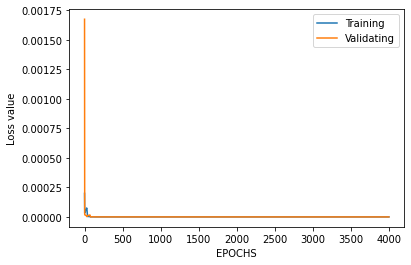

In [13]:
# Evaluating the performance
plt.figure()
plt.plot(losses,  label='Training')
plt.plot(losses_valid,  label='Validating')
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.legend()
plt.show()

##### Pero si evaluamos el modelo desde 3700 a las 4000 epochs. Es decir  últimas 400 muestras podemos apreciar como el modelo hace overfitting (aumentando el error).

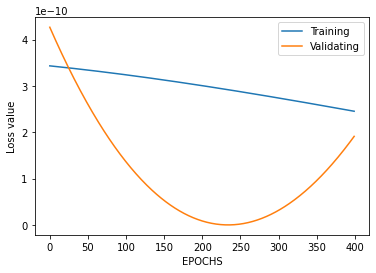

In [22]:
# Evaluating the performance
plt.figure()
plt.plot(losses[3600:, 0],  label='Training')
plt.plot(losses_valid[3600:, 0],  label='Validating')
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.legend()
plt.show()

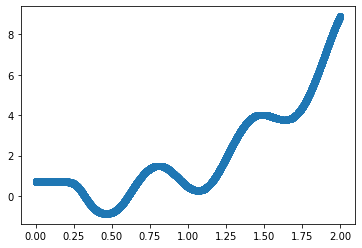

In [23]:
SALIDA = salida[-8000:]
x_salida = train_X[-8000:]
plt.scatter(x_salida,SALIDA)
plt.show()

#### Modelo con regularización L2 , y lambda = 0.0075

In [24]:
parameters, salida, losses, losses_valid= nn_model(train_X, train_y, valid_X, valid_y,8,8,4,ladba=0.0075,learning_rate = 0.0007, num_iterations = 2000)

##### Evaluamos el modelo desde 0 a las 1000 epochs con regularización

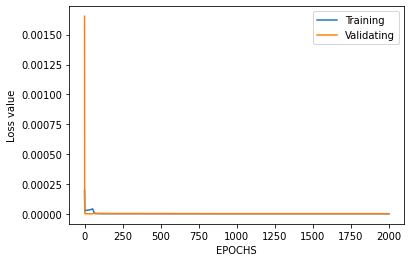

In [25]:
# Evaluating the performance
plt.figure()
plt.plot(losses, label='Training')
plt.plot(losses_valid, label='Validating')
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.legend()
plt.show()

##### Pero si evaluamos el modelo desde 200 a las 2000 epochs. Es decir 1800 muestras podemos apreciar como el modelo tiene un error minimo (0.2x10-6)  de "validating" que se mantiene constante, es decir esta haciendo un buen fit (se estabiliza, desde 500 epochs).

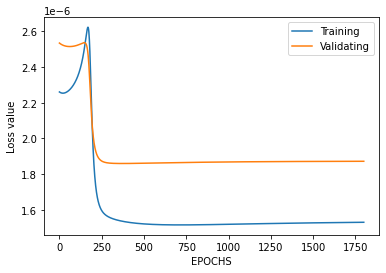

In [28]:
# Evaluating the performance
plt.figure()
plt.plot(losses[200:, 0], label='Training')
plt.plot(losses_valid[200:, 0], label='Validating')
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.legend()
plt.show()

### IMPORTANTE : la diferencia es 0.000004 error entre training y validating

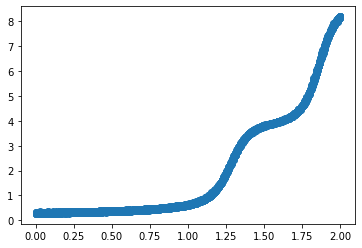

In [29]:
SALIDA = salida[-8000:]
x_salida = train_X[-8000:]
plt.scatter(x_salida,SALIDA)
plt.show()

### Conclusión:
##### En el primer entrenamiento podemos notar como el modelo hace overfiting, el error de entrenamiento luego de 30 ó 40 epochs empieza a crecer, alejandose muy poco del error de entrenamiento hasta cercano a las 1000 epochs. También podemos ver el sobreajuste en el gráfico de salida del modelo entrenado (y_hat).
##### En el segundo entrenamiento con regulación L2, podemos ver que el modelo gana mas generalidad, dado por la penalización de lambda en la función del gradiente. Por lo tanto el modelo terminó logrando una mejor respuesta de entrenamiento. Esto está representado en el error de validadción que a medida de la cantidad de epochs se acerca al error de entrenamiento.